In [1]:
# Import necessary modules
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the individual class
class individual:
    """class to hold individuals"""

    def __init__(self,color): 
        self.color=color

In [3]:
colorList=["red","gray"] # There are two phenotypes

In [4]:
# Define the population class
class population:
    def __init__(self,colorpop,popSize): 
        """Constructor for population class"""
        self.colorpop = colorpop
        self.popSize = popSize
        self.popList = [] #Create an empty list for indivudials
    
        for ind in range(popSize): # add individuals to population
            self.popList.append(individual(color=colorpop))
    
    def countNumber(self): 
        """This costom function calculates the number of phenotypes"""
        red = 0
        gray = 0
        for ind in self.popList:
            if ind.color == "red":
                red += 1
            elif ind.color == "gray":
                gray += 1
        colorNumber = [red,gray]
        return colorNumber
 
    def countPop(self):
        '''Count the number of individuals in each population'''
        return(len(self.popList))

In [5]:
movements=[['AA', 'AB'], ['BB', 'BA']]# A dispersal matrix for np.random.choice to move the individual With the probabilities

In [6]:
# Define the landscape class
class landscape:
    def __init__(self, popID, popSizeL,prob): 
        """Constructor for landscape class"""
        self.popID = popID
        self.landPopulation = population(colorpop = colorList.pop(), popSize = popSizeL)# get data from population class
        self.prob = prob

    def move(self): 
        """move each individual from A to B or B to A, or stay in the original population"""
        if self.popID == 'A': # population A
            randomMove = np.random.choice(movements[0],p = self.prob) # Choose either AA or AB with a probability
            if randomMove == 'AA':
                pass
            elif randomMove == 'AB':
                random.shuffle(self.landPopulation.popList)
                B.landPopulation.popList.append(self.landPopulation.popList.pop())
        elif self.popID == 'B': # population B
            randomMove = np.random.choice(movements[1],p = self.prob) # Choose either BB or BA with a probability
            if randomMove == 'BB':
                pass
            elif randomMove == 'BA':
                random.shuffle(self.landPopulation.popList)
                A.landPopulation.popList.append(self.landPopulation.popList.pop())  

In [7]:
def draw(weeks):
    '''Draw plots for the trend of phenotype distribution in each population over time '''
    '''Draw plots for population in population A and population B over time '''
    
    # Create lists for each phenotype in each population group
    Ared = []
    Agray = []
    Bred = []
    Bgray = []
    
    # Create two lists for the unmber of individuals in each population group
    Apopulation = []
    Bpopulation = []
  
    for w in range(weeks):  # use for loop to simulate movement of each individual between Population A and B in specific weeks
        for ind in landPopulation:
            ind.move()
        popA = A.landPopulation.countNumber(); Ared.append(popA[0]); Agray.append(popA[1])
        popB = B.landPopulation.countNumber(); Bred.append(popB[0]); Bgray.append(popB[1])
        
        Apopulation.append(A.landPopulation.countPop()) # calculate the total number of each popualtion
        Bpopulation.append(B.landPopulation.countPop())
    
    fig, (APlot, BPlot,) = plt.subplots(1,2,figsize=(15, 5))

    APlot.plot(range(weeks), Ared, color = 'r',)
    APlot.plot(range(weeks), Agray, color = 'gray')
    BPlot.plot(range(weeks), Bred, color = 'r')
    BPlot.plot(range(weeks), Bgray, color = 'Gray')

    APlot.set_xlim([0, weeks])
    APlot.set_ylim([0, popSizeLA+1])
    APlot.title.set_text('Population A')
    APlot.set(xlabel='weeks', ylabel='the number of each phenotype')
    APlot.grid() # Add gridding

    BPlot.set_xlim([0, weeks])
    BPlot.set_ylim([0, popSizeLB+1])
    BPlot.title.set_text('Population B')
    BPlot.set(xlabel='weeks')
    BPlot.grid()

    fig.suptitle('The trend of each phenotype in each population in %d weeks'%(weeks))# Title
    
    # draw another plots to show the number of all individuals in each population
    fig2, (APopPlot, BPopPlot,) = plt.subplots(1,2,figsize=(15, 5))

    APopPlot.plot(range(weeks), Apopulation, color = 'b')
    BPopPlot.plot(range(weeks), Bpopulation, color = 'b')

    APopPlot.title.set_text('Population A')
    APopPlot.set(xlabel='weeks', ylabel='the number of all individuals in each population')
    APopPlot.set_xlim([0, weeks])
    APopPlot.grid() # Add gridding

    BPopPlot.title.set_text('Population B')
    BPopPlot.set(xlabel='weeks')
    BPopPlot.set_xlim([0, weeks])
    BPopPlot.grid()
    
    fig2.suptitle('The number of all individuals in each population in %d weeks'%(weeks))

    # Another plots for frequencies
    
    # Create lists to hold frequencies
    AredFreqList = []
    AgrayFreqList = []
    BredFreqList = []
    BgrayFreqList = []
    
    AredFreqList = [a/b for a,b in zip(Ared,Apopulation)]  # calculate the frequency of red birds in Population A
    AgrayFreqList = [a/b for a,b in zip(Agray,Apopulation)] # calculate the frequency of gray birds in Population A
    BredFreqList = [a/b for a,b in zip(Bred,Bpopulation)]  # calculate the frequency of red birds in Population B
    BgrayFreqList = [a/b for a,b in zip(Bgray,Bpopulation)]  # calculate the frequency of gray birds in Population B
    
    fig3, (AFreqPlot, BFreqPlot,) = plt.subplots(1,2,figsize=(15, 5))# draw another plots for frequencies

    AFreqPlot.plot(range(weeks), AredFreqList, color = 'r')
    AFreqPlot.plot(range(weeks), AgrayFreqList, color = 'gray')
    BFreqPlot.plot(range(weeks), BredFreqList, color = 'r')
    BFreqPlot.plot(range(weeks), BgrayFreqList, color = 'gray')

    AFreqPlot.title.set_text('Population A')
    AFreqPlot.set(xlabel='weeks', ylabel='the frequencies of each phenotype in each population')
    AFreqPlot.set_xlim([0, weeks])
    AFreqPlot.set_ylim([0, 1])
    AFreqPlot.grid() # Add gridding

    BFreqPlot.title.set_text('Population B')
    BFreqPlot.set(xlabel='weeks')
    BFreqPlot.set_xlim([0, weeks])
    BFreqPlot.set_ylim([0, 1])
    BFreqPlot.grid()
    
    fig3.suptitle('The number of all individuals in each population in %d weeks'%(weeks))

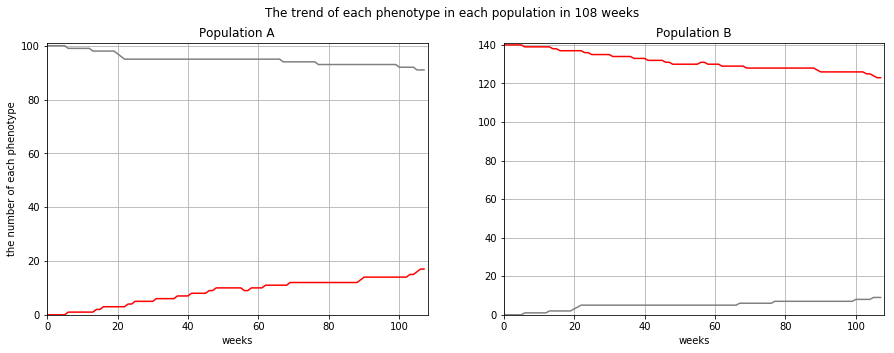

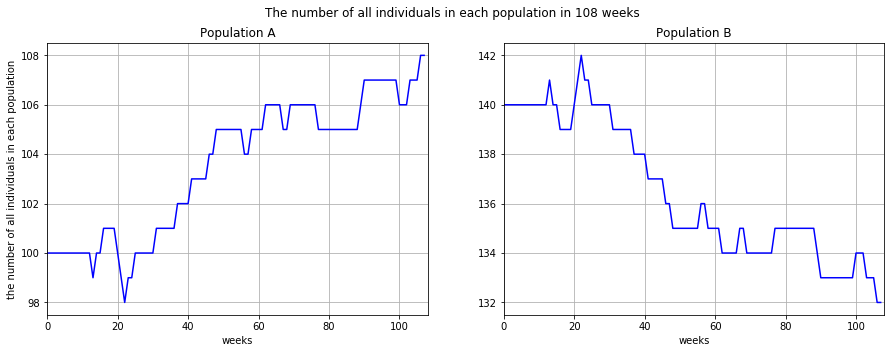

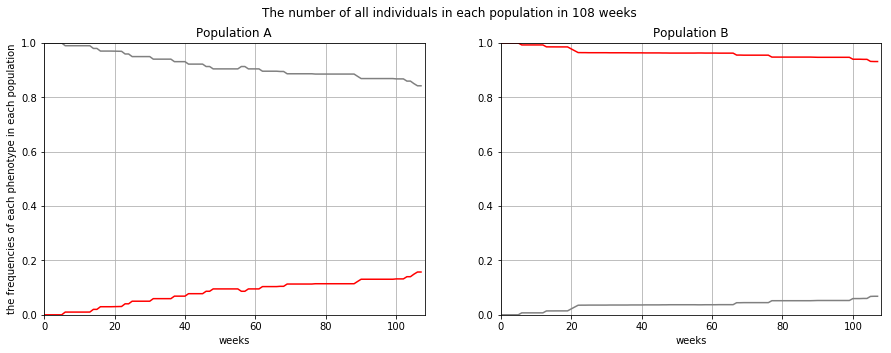

In [20]:
# the first simulation
popSizeLA=100
popSizeLB=140
colorList=["red","gray"]

A = landscape(popID='A',popSizeL=popSizeLA, prob=(0.9,0.1)) # For populationA, each individual have 0.9 probability to stay and 0.1 probalility to move out
B = landscape(popID='B',popSizeL=popSizeLB,prob=(0.8,0.2)) # For populationB, each individual have 0.8 probability to stay and 0.2 probalility to move out
landPopulation=[A,B]

draw(weeks=108) # 2 years